<h1 style="font-size:40px;">Sprint 10 - Proyecto Tomar decisiones de negocios basadas en datos</h1> 

<h1 style="font-size:20px;">Descripción del proyecto</h1> 

Contexto
En el entorno altamente competitivo del comercio electrónico, optimizar la experiencia del usuario y aumentar los ingresos son objetivos clave para cualquier tienda online. En este contexto, el equipo de marketing y análisis de datos de una gran tienda digital ha colaborado para identificar oportunidades de mejora mediante la generación de hipótesis orientadas al crecimiento de una gran tienda en linea y junto con el departamento de marketing lograr que se que pueden ayudar a aumentar los ingresos.

Objetivos del proyecto
Este proyecto se divide en dos fases principales:

1. Priorización de hipótesis
Se aplicaron los modelos ICE (Impact, Confidence, Effort) y RICE (Reach, Impact, Confidence, Effort) para clasificar las hipótesis de mejora con mayor potencial de retorno, permitiendo al equipo tomar decisiones eficientes sobre cuáles ideas probar primero.

2. Análisis de prueba A/B
Una de las hipótesis priorizadas se implementó en un experimento A/B controlado, cuyos resultados se analizaron mediante:

-Gráficos acumulativos de ingresos y pedidos,

-Análisis de tasa de conversión diaria,

-Identificación de valores atípicos,

-Pruebas de significancia estadística (Z-test, U-test, t-test),

-Y comparación detallada entre grupos A (control) y B (experimental).

<h1 style="font-size:40px;">Limpieza de datos</h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind
from statsmodels.stats.proportion import proportions_ztest

In [2]:
df_hypotheses = pd.read_csv('/datasets/hypotheses_us.csv')
print(df_hypotheses)

           Hypothesis;Reach;Impact;Confidence;Effort
0  Add two new channels for attracting traffic. T...
1  Launch your own delivery service. This will sh...
2  Add product recommendation blocks to the store...
3  Change the category structure. This will incre...
4  Change the background color on the main page. ...
5  Add a customer review page. This will increase...
6  Show banners with current offers and sales on ...
7  Add a subscription form to all the main pages....
8  Launch a promotion that gives users discounts ...


In [3]:
print(df_hypotheses.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 1 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Hypothesis;Reach;Impact;Confidence;Effort  9 non-null      object
dtypes: object(1)
memory usage: 200.0+ bytes
None


In [4]:
print(df_hypotheses.head(10))

           Hypothesis;Reach;Impact;Confidence;Effort
0  Add two new channels for attracting traffic. T...
1  Launch your own delivery service. This will sh...
2  Add product recommendation blocks to the store...
3  Change the category structure. This will incre...
4  Change the background color on the main page. ...
5  Add a customer review page. This will increase...
6  Show banners with current offers and sales on ...
7  Add a subscription form to all the main pages....
8  Launch a promotion that gives users discounts ...


In [5]:
print(df_hypotheses.columns)

Index(['Hypothesis;Reach;Impact;Confidence;Effort'], dtype='object')


In [6]:
df_hypotheses = pd.read_csv('/datasets/hypotheses_us.csv', sep=';')

In [7]:
df_orders = pd.read_csv('/datasets/orders_us.csv')
print(df_orders)

      transactionId   visitorId        date  revenue group
0        3667963787  3312258926  2019-08-15     30.4     B
1        2804400009  3642806036  2019-08-15     15.2     B
2        2961555356  4069496402  2019-08-15     10.2     A
3        3797467345  1196621759  2019-08-15    155.1     B
4        2282983706  2322279887  2019-08-15     40.5     B
...             ...         ...         ...      ...   ...
1192     2662137336  3733762160  2019-08-14    100.8     B
1193     2203539145   370388673  2019-08-14     50.1     A
1194     1807773912   573423106  2019-08-14    165.3     A
1195     1947021204  1614305549  2019-08-14      5.5     A
1196     3936777065  2108080724  2019-08-15   3120.1     B

[1197 rows x 5 columns]


In [8]:
print(df_orders.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB
None


In [9]:
df_orders['date'] = pd.to_datetime(df_orders['date'], format='%Y-%m-%d')
print(df_orders.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   float64       
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 46.9+ KB
None


In [10]:
df_visits = pd.read_csv('/datasets/visits_us.csv')
print(df_visits)

          date group  visits
0   2019-08-01     A     719
1   2019-08-02     A     619
2   2019-08-03     A     507
3   2019-08-04     A     717
4   2019-08-05     A     756
..         ...   ...     ...
57  2019-08-27     B     720
58  2019-08-28     B     654
59  2019-08-29     B     531
60  2019-08-30     B     490
61  2019-08-31     B     718

[62 rows x 3 columns]


In [11]:
print(df_visits.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
None


In [12]:
df_visits['date'] = pd.to_datetime(df_visits['date'], format='%Y-%m-%d')
print(df_visits.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB
None


In [13]:
group_a_visitors = set(df_orders[df_orders['group'] == 'A']['visitorId'])
group_b_visitors = set(df_orders[df_orders['group'] == 'B']['visitorId'])


duplicate_visitors = group_a_visitors & group_b_visitors

print(f"Visitantes en ambos grupos: {len(duplicate_visitors)}")

Visitantes en ambos grupos: 58


In [14]:
df_orders = df_orders[~df_orders['visitorId'].isin(duplicate_visitors)]

In [15]:
group_a_visitors = set(df_orders[df_orders['group'] == 'A']['visitorId'])
group_b_visitors = set(df_orders[df_orders['group'] == 'B']['visitorId'])


duplicate_visitors = group_a_visitors & group_b_visitors

print(f"Visitantes en ambos grupos: {len(duplicate_visitors)}")

Visitantes en ambos grupos: 0


Analisis:

-En el dataframe "orders" se cambio la columna "date" de tipo object a "datetime" ya que contiene una fecha"
-De igual forma en el data frame "visits" se cambio la columna "date" de tipo object a datetime debido a que contiene una fecha.
- Se encontraron 58 datos de visitantes en ambos grupos, los cuales fueron eliminados ya que corresponde a una parte del data frame. De este modo se evitan sesgos sin alterar los resultados del analisis de forma significativa.

<h1 style="font-size:40px;">Parte 1. Priorizar hipótesis</h1> 

1.-Aplicar el framework ICE para priorizar hipótesis. Ordenarlas en orden descendente de prioridad.

In [16]:
df_hypotheses['ICE'] = (df_hypotheses['Impact'] * df_hypotheses['Confidence']) / df_hypotheses['Effort']
df_hypotheses_ice_sorted = df_hypotheses.sort_values(by='ICE', ascending=False)
df_hypotheses_ice_sorted[['Hypothesis', 'ICE']]

,Hypothesis,ICE
8,Launch a promotion that gives users discounts ...,16.200000
0,Add two new channels for attracting traffic. T...,13.333333
7,Add a subscription form to all the main pages....,11.200000
6,Show banners with current offers and sales on ...,8.000000
2,Add product recommendation blocks to the store...,7.000000
1,Launch your own delivery service. This will sh...,2.000000
5,Add a customer review page. This will increase...,1.333333
3,Change the category structure. This will incre...,1.125000
4,Change the background color on the main page. ...,1.000000


2.-Aplicar el framework RICE para priorizar hipótesis. Ordenarlas en orden descendente de prioridad.

In [17]:
df_hypotheses['RICE'] = (
    df_hypotheses['Reach'] * df_hypotheses['Impact'] * df_hypotheses['Confidence']
) / df_hypotheses['Effort']


df_hypotheses_rice_sorted = df_hypotheses.sort_values(by='RICE', ascending=False)


df_hypotheses_rice_sorted[['Hypothesis', 'RICE']]

,Hypothesis,RICE
7,Add a subscription form to all the main pages....,112.0
2,Add product recommendation blocks to the store...,56.0
0,Add two new channels for attracting traffic. T...,40.0
6,Show banners with current offers and sales on ...,40.0
8,Launch a promotion that gives users discounts ...,16.2
3,Change the category structure. This will incre...,9.0
1,Launch your own delivery service. This will sh...,4.0
5,Add a customer review page. This will increase...,4.0
4,Change the background color on the main page. ...,3.0


3.-Mostrar cómo cambia la priorización de hipótesis cuando utilizas RICE en lugar de ICE. Proporcionar una explicación de los cambios.

In [18]:
df_hypotheses['ICE_rank'] = df_hypotheses['ICE'].rank(ascending=False)
df_hypotheses['RICE_rank'] = df_hypotheses['RICE'].rank(ascending=False)


df_hypotheses['Rank_Change'] = df_hypotheses['ICE_rank'] - df_hypotheses['RICE_rank']


df_rank_comparison = df_hypotheses.sort_values(by='Rank_Change', ascending=False)


df_rank_comparison[['Hypothesis', 'ICE_rank', 'RICE_rank', 'Rank_Change']]

,Hypothesis,ICE_rank,RICE_rank,Rank_Change
2,Add product recommendation blocks to the store...,5.0,2.0,3.0
3,Change the category structure. This will incre...,8.0,6.0,2.0
7,Add a subscription form to all the main pages....,3.0,1.0,2.0
6,Show banners with current offers and sales on ...,4.0,3.5,0.5
4,Change the background color on the main page. ...,9.0,9.0,0.0
5,Add a customer review page. This will increase...,7.0,7.5,-0.5
0,Add two new channels for attracting traffic. T...,2.0,3.5,-1.5
1,Launch your own delivery service. This will sh...,6.0,7.5,-1.5
8,Launch a promotion that gives users discounts ...,1.0,5.0,-4.0


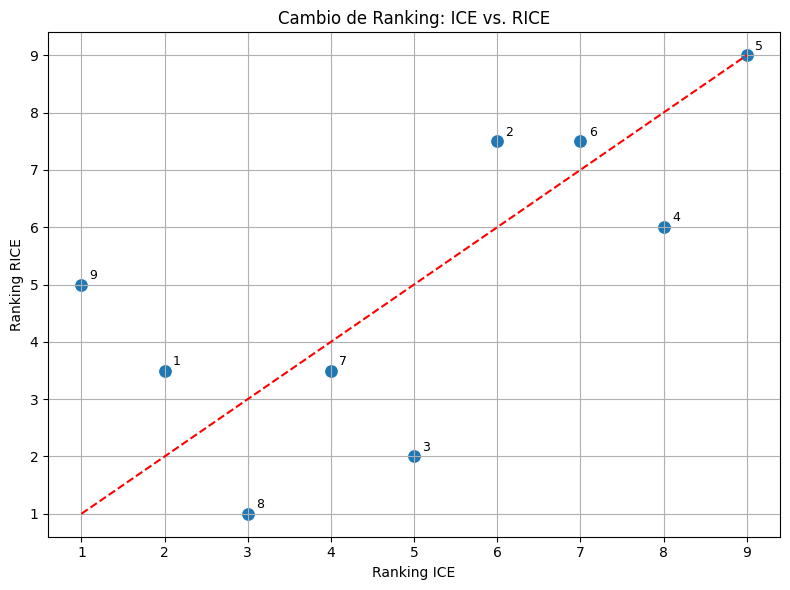

In [19]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_hypotheses,
    x='ICE_rank',
    y='RICE_rank',
    s=100
)


plt.plot([1, df_hypotheses['ICE_rank'].max()], [1, df_hypotheses['RICE_rank'].max()], 'r--')


for i in range(len(df_hypotheses)):
    plt.text(
        df_hypotheses['ICE_rank'].iloc[i] + 0.1,
        df_hypotheses['RICE_rank'].iloc[i] + 0.1,
        str(i + 1),  
        fontsize=9
    )

plt.title('Cambio de Ranking: ICE vs. RICE')
plt.xlabel('Ranking ICE')
plt.ylabel('Ranking RICE')
plt.grid(True)
plt.tight_layout()
plt.show()

<h1 style="font-size:15px;">Analisis framework ICE, RICE Y cómo cambia la priorización de hipótesis cuando utilizas RICE en lugar de ICE</h1>


Despues de analizar la informacion previamente mostrada, se puede concluir lo siguiente:

ICE

La hipótesis no. 8 (ofrecer un regalo en compras > $200) encabeza la lista y tiene un ICE más  alto, ya que requiere poco esfuerzo y tiene alta confianza, ademas de que los clientes siempre se sientes atraidos por ofertas y promociones que llamen su atención.

La hipótesis #0 (nuevos canales) también destaca por tener impacto al llamar más la atención de los clientes y  y ser fácil de implementar ya que Nuevos canales de adquisición pueden significar más visitantes → más pedidos → más ingresos y si el Si el canal es bien seleccionado (por ejemplo, redes sociales, afiliados, SEO), puede escalar rápidamente.

La hipotesis que menor impacto tiene es la numero 6 ya que generalmente cambiar el color no suele alterar significativamente el comportamiento del usuario ni afecta directamente a la decisión de compra, además de que No mejora ni la navegación, ni la visibilidad de productos, ni reduce las críticas, solo es una modificación estetica,más  no funcional.

RICE
la hipótesis #7 (reseñas de usuarios) pasa al primer lugar, ya que tiene alto Reach, buen impacto y confianza ya que al ser una opinion directa del cliente, es una fuente hipotesis de alta confianza y la opinion de los clientes la que más impacta en un negocio y las opiniones de las clientes permiten mejorar la expeiencia del usuario asi como atraer a más clientes.

La #2 (rediseño del botón de compra y agregar recomedaciones del producto) tiene el lugar número dos debido a su gran Reach, aunque su ICE es menor.

Al igual que en Ice la hipotesis que menor RICE tiene es la número 6 principalmente por las mismas razones mencionadas anteriormente, además de Aunque suena sencillo, cambiar colores puede implicar rediseño visual, revisión de UX/UI, pruebas de accesibilidad, revisiones de branding, etc. Incluso si se hace el cambio, no todos los usuarios lo notarían o reaccionarían a ello, algunas personas acceden directamente a páginas de productos o desde móviles donde el color puede ser menos perceptible.


Por ultimo en cuanto a la comparacion entre ICE Y RICE se puede notar que si hay cambios entre las dos, ya que el El orden cambia significativamente al considerar el Reach, Por ejemplo, #8 cae del 1º al 6º lugar porque su alcance es limitado. y que ICE es útil en etapas iniciales o cuando el presupuesto es ajustado y RICE es ideal cuando se buscan acciones con mayor retorno agregado y se tiene un público amplio.


 <h1 style="font-size:25px;">Parte 2. Análisis del test A/B</h1> 

1.-Representa gráficamente el ingreso acumulado por grupo

In [20]:
revenue_daily = df_orders.groupby(['date', 'group'])['revenue'].sum().reset_index()


revenue_pivot = revenue_daily.pivot(index='date', columns='group', values='revenue').fillna(0)

revenue_pivot['A_cumulative'] = revenue_pivot['A'].cumsum()
revenue_pivot['B_cumulative'] = revenue_pivot['B'].cumsum()

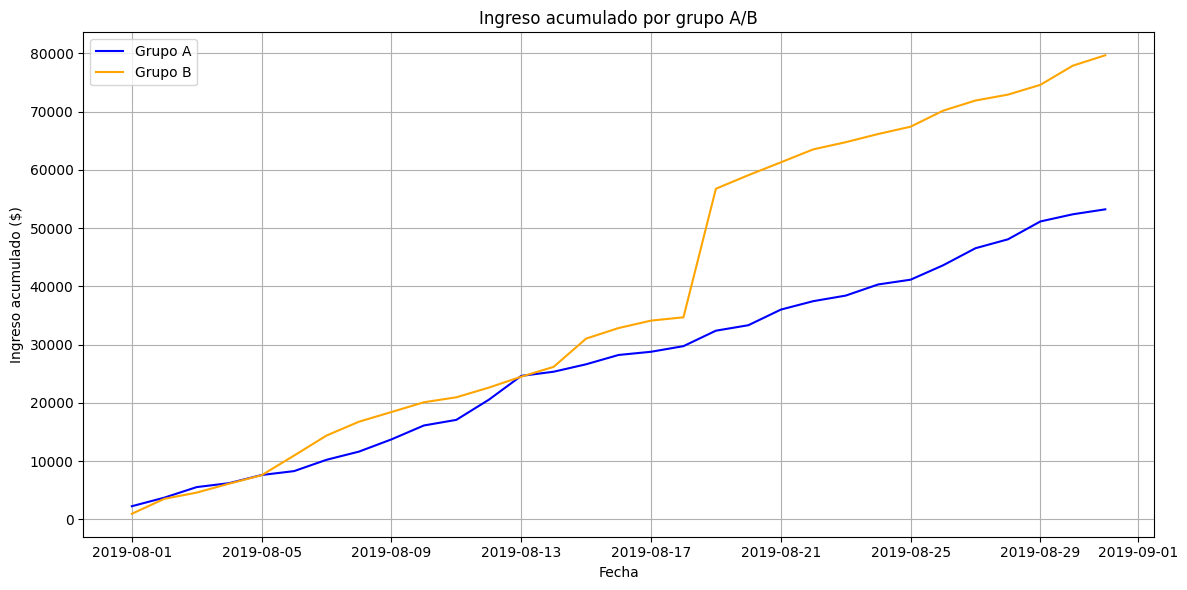

In [21]:
plt.figure(figsize=(12, 6))
plt.plot(revenue_pivot.index, revenue_pivot['A_cumulative'], label='Grupo A', color='blue')
plt.plot(revenue_pivot.index, revenue_pivot['B_cumulative'], label='Grupo B', color='orange')

plt.title('Ingreso acumulado por grupo A/B')
plt.xlabel('Fecha')
plt.ylabel('Ingreso acumulado ($)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

- Al analizar la grafica anterior se puede notar que el grupo b es el grupo que genera mayor ingreso al final del periodo analizado y se mantiene con más ingresos en la mayor parte de todos los periodos, siendo solo ligeramente rebasado por el grupo a en el dia 13 de agosto, sin embargo se separan posteriormente y al final se obtienen ingresos de 80.000 al final del periodo contra 53,000 del grupo A.

En otras palabras, Ambas líneas crecen de forma similar hasta cierto punto, sin embargo, Hacia el final, grupo B muestra un salto repentino, lo que sugiere pedidos atípicos (muy altos).  Esto puede ser  por pocos usuarios con pedidos muy caros.

2.-Representa gráficamente el tamaño de pedido promedio acumulado por grupo. Haz conclusiones y conjeturas.

In [22]:
orders_grouped = df_orders.groupby(['date', 'group']).agg(
    revenue_sum=('revenue', 'sum'),
    orders_count=('transactionId', 'nunique')
).reset_index()


revenue_pivot = orders_grouped.pivot(index='date', columns='group', values='revenue_sum').fillna(0)
orders_pivot = orders_grouped.pivot(index='date', columns='group', values='orders_count').fillna(0)


revenue_cum = revenue_pivot.cumsum()
orders_cum = orders_pivot.cumsum()


avg_order_size = revenue_cum / orders_cum

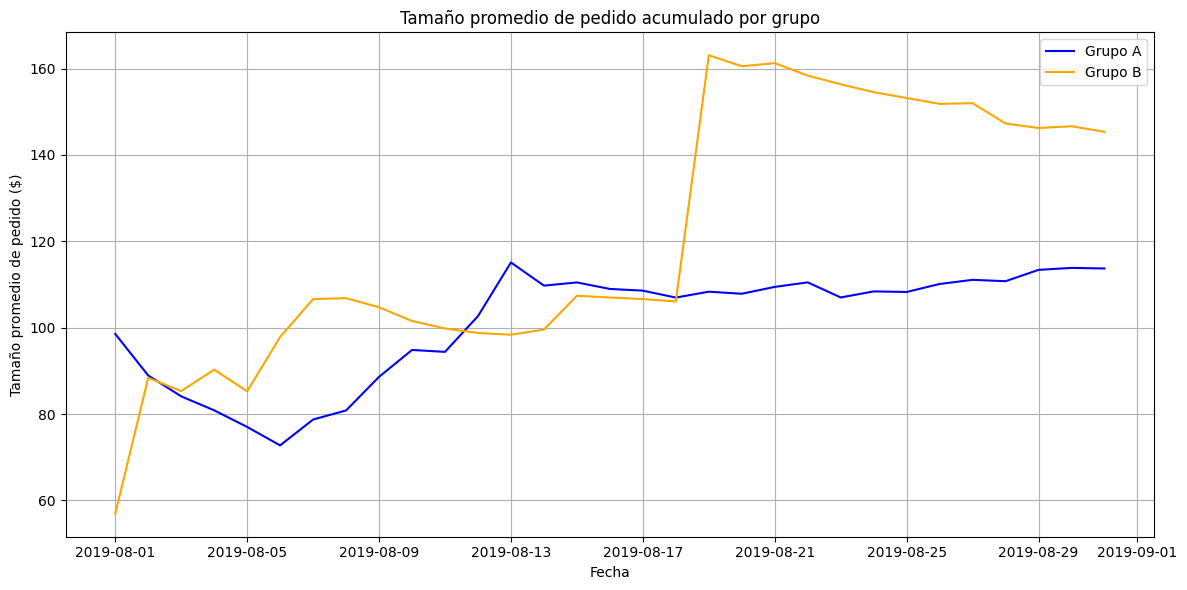

In [23]:
plt.figure(figsize=(12, 6))
plt.plot(avg_order_size.index, avg_order_size['A'], label='Grupo A', color='blue')
plt.plot(avg_order_size.index, avg_order_size['B'], label='Grupo B', color='orange')

plt.title('Tamaño promedio de pedido acumulado por grupo')
plt.xlabel('Fecha')
plt.ylabel('Tamaño promedio de pedido ($)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Respecto a la grafica anterior se puede notar que hay volatilidad alta en los primeros días ya que Al inicio, los valores de ambos grupos fluctúan mucho, sim embargo Ambas líneas se estabilizan y la curva de ambos grupos se suaviza y se puede ver una tendencia más clara.

En la maypria fechas, el grupo B está por encima del grupo A, especialmente al final del experimento, lo que muestra que el experimento podría estar generando pedidos más caros.

3.- Representa gráficamente la diferencia relativa en el tamaño de pedido promedio acumulado para el grupo B en comparación con el grupo A. Haz conclusiones y conjeturas.

In [24]:

orders_grouped = df_orders.groupby(['date', 'group']).agg(
    revenue_sum=('revenue', 'sum'),
    orders_count=('transactionId', 'nunique')
).reset_index()


revenue_pivot = orders_grouped.pivot(index='date', columns='group', values='revenue_sum').fillna(0)
orders_pivot = orders_grouped.pivot(index='date', columns='group', values='orders_count').fillna(0)


revenue_cum = revenue_pivot.cumsum()
orders_cum = orders_pivot.cumsum()


avg_order_size = revenue_cum / orders_cum


relative_diff = (avg_order_size['B'] - avg_order_size['A']) / avg_order_size['A']

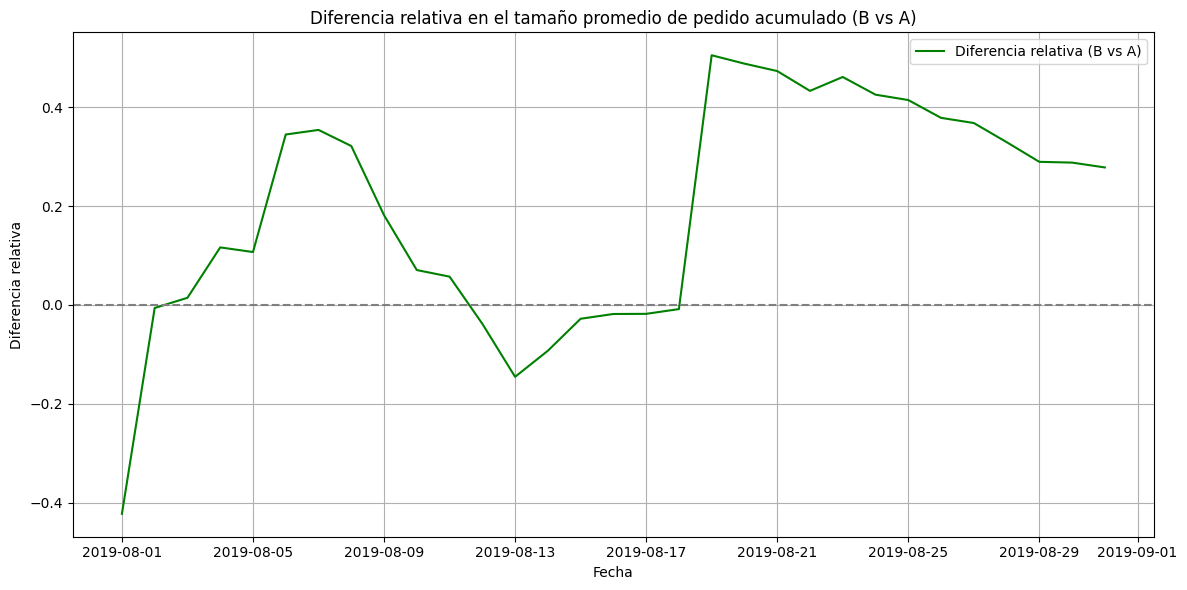

In [25]:
plt.figure(figsize=(12, 6))
plt.plot(relative_diff.index, relative_diff, label='Diferencia relativa (B vs A)', color='green')

plt.axhline(y=0, color='gray', linestyle='--')  # Línea base en 0
plt.title('Diferencia relativa en el tamaño promedio de pedido acumulado (B vs A)')
plt.xlabel('Fecha')
plt.ylabel('Diferencia relativa')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

En la grafica anterior se puede observar una tendencia positiva y que el grupo Grupo B mantiene un tamaño de pedido promedio superior al A. En varios días, el grupo B tiene un ticket promedio acumulado que supera al del grupo A en un 10% o más. o que refuerza la hipótesis de que la intervención aplicada al grupo B tiene un impacto positivo en el tamaño del pedido.

En cuanto a la conjetura es probable que la modificación aplicada al grupo B (por ejemplo, promociones, ofertas o rediseño de la página de productos) esté motivando a los usuarios a gastar más.

4.-Calcula la tasa de conversión de cada grupo como la relación entre los pedidos y el número de visitas de cada día. Representa gráficamente las tasas de conversión diarias de los dos grupos y describe la diferencia. Saca conclusiones y haz conjeturas.

In [26]:
daily_orders = df_orders.groupby(['date', 'group'])['transactionId'].nunique().reset_index()
daily_orders.rename(columns={'transactionId': 'orders'}, inplace=True)


df_conversions = pd.merge(df_visits, daily_orders, on=['date', 'group'], how='left')
df_conversions['orders'] = df_conversions['orders'].fillna(0)


df_conversions['conversion_rate'] = df_conversions['orders'] / df_conversions['visits']


conversion_A = df_conversions[df_conversions['group'] == 'A']
conversion_B = df_conversions[df_conversions['group'] == 'B']

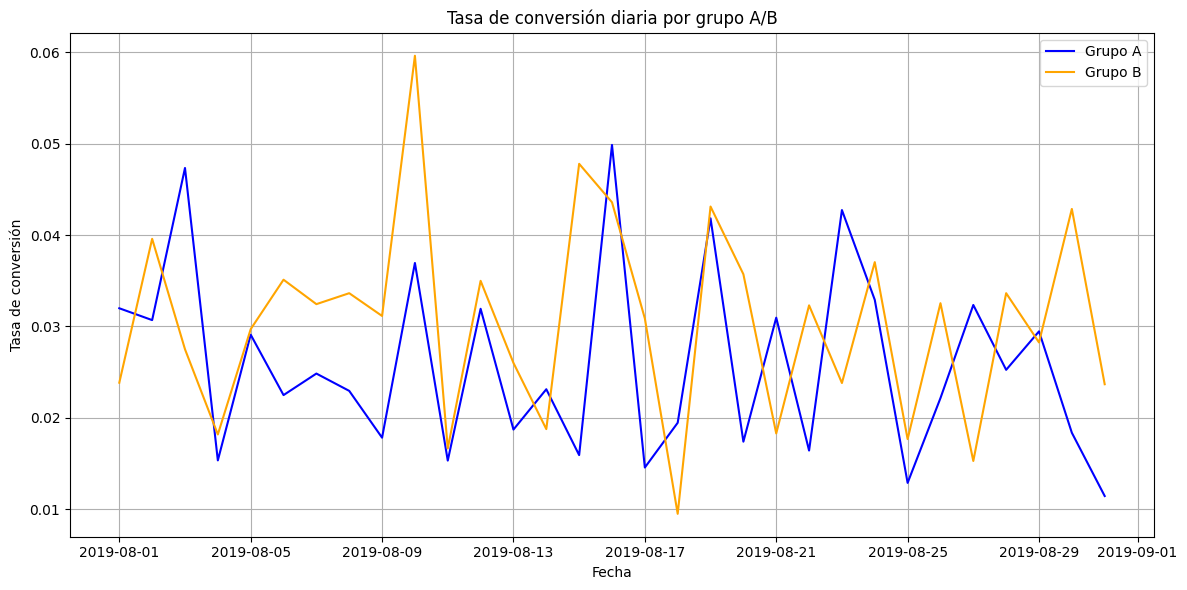

In [27]:
plt.figure(figsize=(12, 6))
plt.plot(conversion_A['date'], conversion_A['conversion_rate'], label='Grupo A', color='blue')
plt.plot(conversion_B['date'], conversion_B['conversion_rate'], label='Grupo B', color='orange')

plt.title('Tasa de conversión diaria por grupo A/B')
plt.xlabel('Fecha')
plt.ylabel('Tasa de conversión')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

La grafica muestra que Ambas líneas muestran variabilidad diaria, lo cual es esperable por la naturaleza del tráfico online y el comportamiento del usuario y que aunque hay días en los que A y B están cercanos, o incluso A supera a B, en la mayoría de los días B tiene una conversión superior ya que en varios puntos se observa una diferencia clara a favor del grupo B.

En otras palabras Aunque la variabilidad diaria puede sugerir ruido, la tendencia global indica que el grupo B convierte mejor que A y que La hipótesis aplicada al grupo B pudo haber mejorado aspectos como la usabilidad del sitio, el proceso de pago (menos fricción), La confianza del usuario (mejor diseño, información más clara), O bien, se aplicaron elementos como urgencia o escasez (por ejemplo: “últimos productos”).

5.- Traza un gráfico de dispersión del número de pedidos por usuario. Haz conclusiones y conjeturas.

In [28]:
orders_by_user = df_orders.groupby('visitorId')['transactionId'].nunique().reset_index()
orders_by_user.rename(columns={'transactionId': 'orders'}, inplace=True)

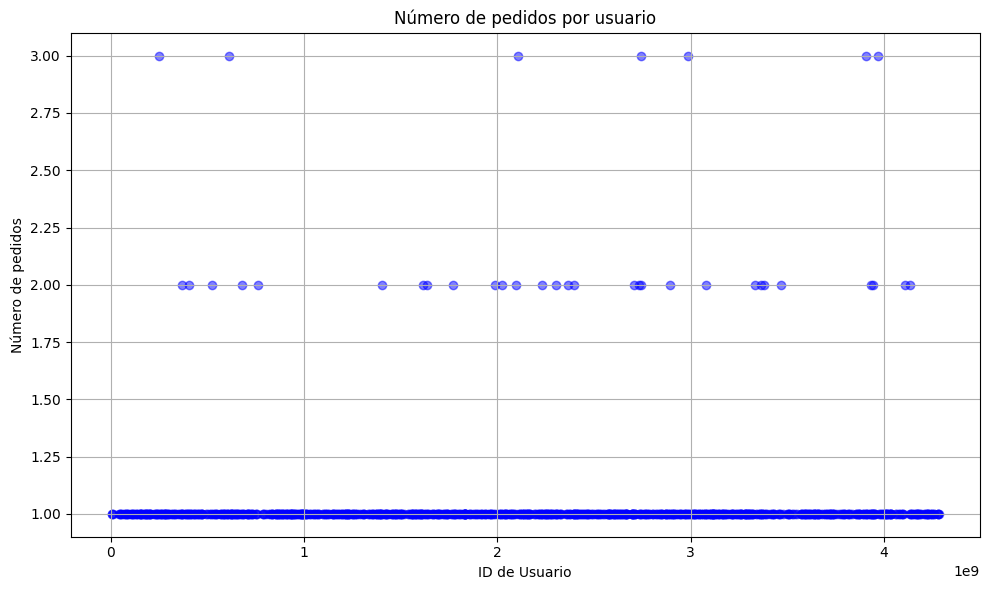

In [29]:
plt.figure(figsize=(10, 6))
plt.scatter(orders_by_user['visitorId'], orders_by_user['orders'], alpha=0.5, color='blue', marker='o')

plt.title('Número de pedidos por usuario')
plt.xlabel('ID de Usuario')
plt.ylabel('Número de pedidos')
plt.grid(True)
plt.tight_layout()
plt.show()

En el grafico de dispersión se puede notar que la gran mayoría de usuarios hizo solo 1 pedido y aunque hay algunos puntos por encima del valor 1, indicando usuarios que hicieron 2, 3 o más pedidos Estos usuarios son poco frecuentes pero pueden tener impacto significativo en los promedios y totales y se observan muy pocos puntos aislados (o valores atipicos)  muy por encima del promedio, como usuarios con 4, 5 o incluso más pedidos.

En otras palabras la distribución es altamente sesgada hacia un solo pedido por usuario y hay muy pocos usuarios con múltiples compras, y algunos pueden ser outliers importantes.

Estos usuarios con múltiples pedidos pueden ser clientes fieles o recurrentes (ya conocían la tienda) o bien usuarios que aprovechan promociones intensamente (ej. descuentos por volumen).

6.- Calcula los percentiles 95 y 99 del número de pedidos por usuario. Define el punto en el cual un punto de datos se convierte en una anomalía.

In [30]:
orders_by_user = df_orders.groupby('visitorId')['transactionId'].nunique().reset_index()
orders_by_user.rename(columns={'transactionId': 'orders'}, inplace=True)


percentile_95 = orders_by_user['orders'].quantile(0.95)
percentile_99 = orders_by_user['orders'].quantile(0.99)

print(f"Percentil 95 del número de pedidos por usuario: {percentile_95}")
print(f"Percentil 99 del número de pedidos por usuario: {percentile_99}")

Percentil 95 del número de pedidos por usuario: 1.0
Percentil 99 del número de pedidos por usuario: 2.0


In [31]:
anomalies = orders_by_user[orders_by_user['orders'] > percentile_99]

print(f"Número de usuarios con más pedidos que el percentil 99: {len(anomalies)}")
print(f"Usuarios con anomalías:\n{anomalies[['visitorId', 'orders']]}")

Número de usuarios con más pedidos que el percentil 99: 7
Usuarios con anomalías:
      visitorId  orders
55    249864742       3
138   611059232       3
478  2108163459       3
632  2742574263       3
687  2988190573       3
890  3908431265       3
908  3967698036       3


Despues de analizar la informacion anterior se puede notar que hay una gran concentración de usuarios que hicieron un solo pedido, teniendo una diferencia marcada entre los usuarios y reduciendo más drasticamente en los usuarios que hicieron 3 pedidos, ya que Usuarios con 3 o más pedidos representan menos del 1% del total y se consideran outliers por lo cual dichos  Usuarios con 3 o más pedidos se convierten en anómalos estadísticamente. 

7.-Traza un gráfico de dispersión de los precios de los pedidos. Haz conclusiones y conjeturas.

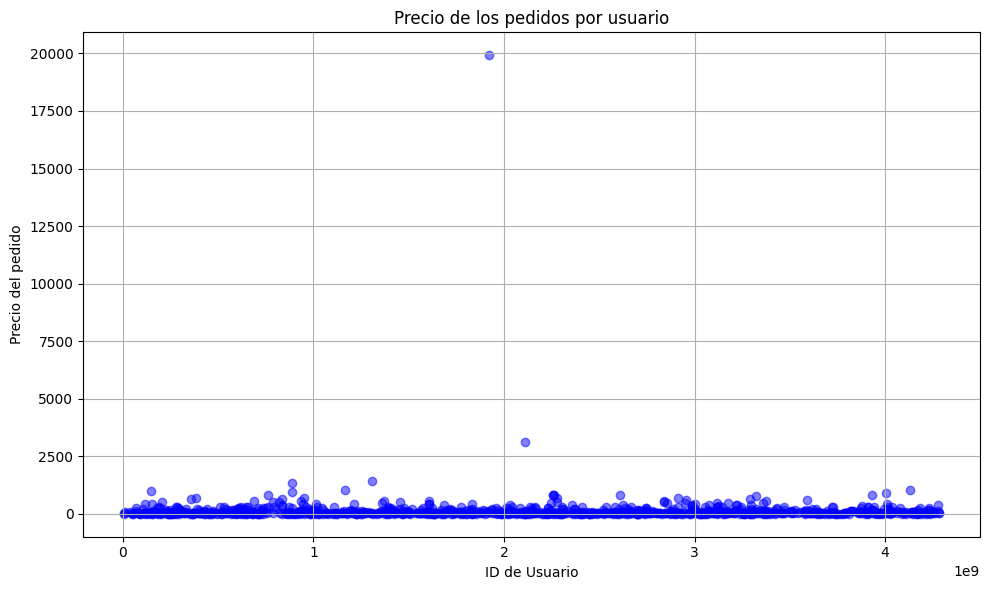

In [32]:
plt.figure(figsize=(10, 6))
plt.scatter(df_orders['visitorId'], df_orders['revenue'], alpha=0.5, color='blue', marker='o')

plt.title('Precio de los pedidos por usuario')
plt.xlabel('ID de Usuario')
plt.ylabel('Precio del pedido')
plt.grid(True)
plt.tight_layout()
plt.show()

Respecto a los precios de los pedidos, se puede observar que La mayoría de los puntos se encuentran en un rango bajo o medio (por ejemplo, entre 50 y 300 USD), es decir que los clientes muestran una preferencia por los articulos de bajo costo o estandar. 

Muy pocos puntos o pedidos están muy por encima de la media, sin embargo deben tomarse en cuenta  en cuanto a valor de compra y pueden sesgar fuertemente el promedio del ticket de pedido.

Dado lo anterior se puede sugerir promociones con precios fijos o bien hacer más publicidad de productos populares con un precio estándar.

8.-Calcula los percentiles 95 y 99 de los precios de los pedidos. Define el punto en el cual un punto de datos se convierte en una anomalía.

In [33]:
percentile_95 = df_orders['revenue'].quantile(0.95)
percentile_99 = df_orders['revenue'].quantile(0.99)

print(f"Percentil 95 del precio de los pedidos: {percentile_95}")
print(f"Percentil 99 del precio de los pedidos: {percentile_99}")

Percentil 95 del precio de los pedidos: 414.275
Percentil 99 del precio de los pedidos: 830.3


In [34]:
anomalies = df_orders[df_orders['revenue'] > percentile_99]

print(f"Número de pedidos con precios mayores que el percentil 99: {len(anomalies)}")
print(f"Pedidos con anomalías:\n{anomalies[['transactionId', 'revenue']]}")

Número de pedidos con precios mayores que el percentil 99: 9
Pedidos con anomalías:
      transactionId  revenue
425       590470918  19920.4
743      3603576309   1050.0
744      3668308183   1335.6
940      2420050534    905.8
949      1347999392    930.0
1099      316924019   1015.9
1103     1348774318   1025.8
1136      666610489   1425.8
1196     3936777065   3120.1


Como se menciono anteriormente se muestra una alta concentración de pedidos en un rango estándar (ej. 50–300 USD) y que Hay pedidos inusualmente altos que, aunque reales, representan menos del 1%.

Estos valores extremos podrían deberse a Usuarios corporativos o mayoristas, Compras impulsadas por promociones exclusivas o recomendaciones exitosas, o bien compras de múltiples artículos caros que contarian como conjeturas y anomaliás.

9.- Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos en bruto. Haz conclusiones y conjeturas.

In [35]:
orders_by_group = df_orders.groupby('group')['visitorId'].nunique().reset_index(name='orders')


visits_by_group = df_visits.groupby('group')['visits'].sum().reset_index()


conversion = orders_by_group.merge(visits_by_group, on='group')


conversion['conversion_rate'] = conversion['orders'] / conversion['visits']
print("Tasa de conversión por grupo:")
print(conversion)

Tasa de conversión por grupo:
  group  orders  visits  conversion_rate
0     A     445   18736         0.023751
1     B     528   18916         0.027913


In [36]:
orders_A = conversion.loc[conversion['group'] == 'A', 'orders'].values[0]
orders_B = conversion.loc[conversion['group'] == 'B', 'orders'].values[0]

visits_A = conversion.loc[conversion['group'] == 'A', 'visits'].values[0]
visits_B = conversion.loc[conversion['group'] == 'B', 'visits'].values[0]


z_stat, p_value = proportions_ztest(count=[orders_A, orders_B], nobs=[visits_A, visits_B])


print(f"\nEstadístico Z: {z_stat:.4f}")
print(f"Valor p: {p_value:.4f}")


Estadístico Z: -2.5449
Valor p: 0.0109


In [37]:
if p_value < 0.05:
    print("✅ Hay una diferencia estadísticamente significativa entre las tasas de conversión de los grupos.")
else:
    print("❌ No hay evidencia suficiente para afirmar que hay una diferencia significativa entre los grupos.")

✅ Hay una diferencia estadísticamente significativa entre las tasas de conversión de los grupos.


Analizando lo anterior, como p = 0.0109 < 0.05, rechazamos la hipótesis nula H₀, Esto indica que sí existe una diferencia estadísticamente significativa en la conversión entre los grupos A y B ya que el valor negativo de Z sugiere que la tasa de conversión del grupo B es superior (si tomamos B - A como la diferencia).

10.- Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos en bruto. Haz conclusiones y conjeturas.

In [38]:
group_a_revenue = df_orders[df_orders['group'] == 'A']['revenue']
group_b_revenue = df_orders[df_orders['group'] == 'B']['revenue']


mean_a = group_a_revenue.mean()
mean_b = group_b_revenue.mean()

print(f"Tamaño promedio del pedido - Grupo A: {mean_a:.2f}")
print(f"Tamaño promedio del pedido - Grupo B: {mean_b:.2f}")

Tamaño promedio del pedido - Grupo A: 113.70
Tamaño promedio del pedido - Grupo B: 145.35


In [39]:
stat, p_value = mannwhitneyu(group_a_revenue, group_b_revenue, alternative='two-sided')

print(f"Estadístico U: {stat:.3f}")
print(f"Valor p: {p_value:.4f}")

Estadístico U: 129041.500
Valor p: 0.8622


In [40]:
if p_value < 0.05:
    print("✅ Hay una diferencia estadísticamente significativa en el tamaño promedio de pedido entre los grupos.")
else:
    print("❌ No hay diferencia estadísticamente significativa en el tamaño promedio de pedido entre los grupos.")

❌ No hay diferencia estadísticamente significativa en el tamaño promedio de pedido entre los grupos.


Despues de analizar la informacion anterior se puede identificar que Aunque el grupo B tiene un promedio visiblemente mayor (145.35 vs 113.70), La variabilidad en los datos es alta por lo que La diferencia entre medias no es lo suficientemente consistente o fuerte como para ser estadísticamente significativa.

11.- Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos filtrados. Haz conclusiones y conjeturas.

In [41]:
group_a_visits = df_visits[df_visits['group'] == 'A']
group_b_visits = df_visits[df_visits['group'] == 'B']


group_a_orders = df_orders[df_orders['group'] == 'A']
group_b_orders = df_orders[df_orders['group'] == 'B']


conversion_a = group_a_orders.groupby('visitorId').size().count() / group_a_visits['visits'].sum()
conversion_b = group_b_orders.groupby('visitorId').size().count() / group_b_visits['visits'].sum()


print(f"Tasa de conversión - Grupo A: {conversion_a:.4f}")
print(f"Tasa de conversión - Grupo B: {conversion_b:.4f}")

Tasa de conversión - Grupo A: 0.0238
Tasa de conversión - Grupo B: 0.0279


In [42]:
stat, p_value = mannwhitneyu(group_a_visits['visits'], group_b_visits['visits'], alternative='two-sided')

print(f"Estadístico U: {stat:.3f}")
print(f"Valor p: {p_value:.4f}")

Estadístico U: 455.500
Valor p: 0.7301


In [43]:
if p_value < 0.05:
    print("✅ Hay una diferencia estadísticamente significativa en la tasa de conversión entre los grupos.")
else:
    print("❌ No hay suficiente evidencia para rechazar la hipótesis nula. No hay diferencia significativa en las tasas de conversión.")

❌ No hay suficiente evidencia para rechazar la hipótesis nula. No hay diferencia significativa en las tasas de conversión.


Al analizar la información anterior se puede concluir que El valor p = 0.7301 es mucho mayor al umbral común de significancia (0.05), lo que indica que no hay suficiente evidencia estadística para afirmar que las tasas de conversión de A y B son diferentes y que aunque el grupo B tiene una tasa levemente mayor (0.0279 vs 0.0238), esa diferencia podría deberse al azar, y no se puede atribuir con confianza a un cambio real causado por el experimento.

En otras palabras,  no se puede afirmar que el grupo B tenga mejor conversión que el grupo A tras filtrar los datos.
La diferencia observada es pequeña y no significativa desde el punto de vista estadístico (valor p = 0.7301).
Por tanto, no hay evidencia suficiente para recomendar el cambio con base en la tasa de conversión.

12.- Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos filtrados. Haz conclusiones y conjeturas.

In [44]:
group_a_orders = df_orders[df_orders['group'] == 'A']
group_b_orders = df_orders[df_orders['group'] == 'B']


group_a_avg_order_size = group_a_orders['revenue'].mean()
group_b_avg_order_size = group_b_orders['revenue'].mean()

print(f"Tamaño promedio de pedido - Grupo A: {group_a_avg_order_size:.2f}")
print(f"Tamaño promedio de pedido - Grupo B: {group_b_avg_order_size:.2f}")

Tamaño promedio de pedido - Grupo A: 113.70
Tamaño promedio de pedido - Grupo B: 145.35


In [45]:
stat, p_value = ttest_ind(group_a_orders['revenue'], group_b_orders['revenue'])

print(f"Estadístico t: {stat:.3f}")
print(f"Valor p: {p_value:.4f}")

Estadístico t: -0.776
Valor p: 0.4381


In [46]:
if p_value < 0.05:
    print("✅ Hay una diferencia estadísticamente significativa en el tamaño promedio de pedido entre los grupos A y B.")
else:
    print("❌ No hay suficiente evidencia para rechazar la hipótesis nula. No hay diferencia significativa en el tamaño promedio de pedido entre los grupos A y B.")

❌ No hay suficiente evidencia para rechazar la hipótesis nula. No hay diferencia significativa en el tamaño promedio de pedido entre los grupos A y B.


Despues de analizar lo anterior, podemos decir que el valor p = 0.4381 es muy superior al grado de significancia (0.05) por lo que esto implica que no hay evidencia suficiente para rechazar la hipótesis nula. Es decir, aunque el grupo B parece tener un pedido promedio mayor (145.35 vs. 113.70), la diferencia no es estadísticamente significativa.

13.- Toma una decisión basada en los resultados de la prueba. Las decisiones posibles son: 1. Parar la prueba, considerar a uno de los grupos como líder. 2. Parar la prueba, concluir que no hay diferencia entre los grupos. 3. Continuar la prueba.

Inicialmente, el grupo B mostraba una mejor conversión y tamaño de pedido, lo que sugiere una mejora del cambio propuesto, sin embargo Sin embargo, al hacer las pruebas estadisticas de valor p y t, la diferencia desaparece estadísticamente, especialmente en Conversión (U = 455.5, p = 0.7301) y Tamaño promedio pedido (t = -0.776, p = 0.4381). Por lo que lo más ideal seria parar la prueba, concluir que no hay diferencia entre los grupos como lo marcan las pruebas estadisticas ya que No hay evidencia sólida para declarar a B como mejor, Extender la prueba probablemente no aporte mucho más valor y Es más eficiente parar ahora y analizar otras hipótesis con mejor RICE/ICE y como recomendación final del proyecto La tienda online debería centrarse en probar otras hipótesis priorizadas con ICE y RICE, como por ejemplo Lanzar una campaña de marketing exclusiva para suscriptores o Agregar dos nuevos canales para atraer tráfico.